# Data Importation

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing, model_selection
import missingno as msno

In [143]:
# ## Import data stored in google Cloud 

# wvs_path = "gs://wvs-happiness-data/WVS_Time_Series_1981-2022_csv_v5_0.csv"
# df = pd.read_csv(wvs_path)
# print(df.head())


In [144]:
wvs_path = "C:/Users/PC/Desktop/data/WVS_Time_Series_1981-2022_csv_v5_0.csv"
df = pd.read_csv(wvs_path)
df.head()

,version,doi,S001,S002VS,S003,COUNTRY_ALPHA,COW_NUM,COW_ALPHA,S004,S006,...,Y023A,Y023B,Y023C,Y024A,Y024B,Y024C,survself,tradrat5,TradAgg,SurvSAgg
0,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,1,...,0.000000,0.444444,0.444444,0.33,0.0,0.165,-1.011276,0.160847,0.158964,-1.792410
1,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,2,...,0.111111,0.444444,0.444444,0.33,0.0,0.165,-0.688773,0.409283,0.558946,-1.208679
2,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,3,...,0.000000,0.444444,0.444444,0.33,0.5,0.415,NaN,NaN,NaN,NaN
3,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,4,...,0.000000,0.333333,0.333333,0.33,0.0,0.165,-1.319863,0.733956,1.081669,-2.350952
4,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,3,8,ALB,339,ALB,1,5,...,0.000000,0.333333,0.333333,0.00,0.5,0.250,NaN,NaN,NaN,NaN


In [145]:
df = df.sample(frac=0.5, random_state=42).reset_index(drop=True)

# Force garbage collection to free memory
import gc
gc.collect()

df.head()

,version,doi,S001,S002VS,S003,COUNTRY_ALPHA,COW_NUM,COW_ALPHA,S004,S006,...,Y023A,Y023B,Y023C,Y024A,Y024B,Y024C,survself,tradrat5,TradAgg,SurvSAgg
0,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,7,764,THA,800,THI,-4,764070201,...,0.000000,0.000000,0.888889,0.33,0.0,0.165,0.422108,-0.124064,-0.299743,0.802016
1,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,7,643,RUS,365,RUS,-4,643070224,...,0.000000,1.000000,1.000000,0.00,0.0,0.000,0.138499,1.017501,1.538177,0.288683
2,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,5,894,ZMB,551,ZAM,-4,546,...,0.555556,0.555556,0.000000,0.33,1.0,0.665,0.009804,0.368455,0.493213,0.055745
3,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,4,376,ISR,666,ISR,-4,468,...,0.222222,0.666667,0.222222,1.00,0.0,0.500,-0.167854,0.250569,0.303416,-0.265816
4,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,6,356,IND,750,IND,-4,775,...,0.000000,0.000000,0.000000,0.33,1.0,0.665,NaN,NaN,NaN,NaN


In [146]:
df_original = df.copy()

##

In [147]:
import psutil

# Check available memory
available_memory = psutil.virtual_memory().available / (1024 ** 3)  # in GB
print(f"Available memory: {available_memory:.2f} GB")

# Estimate memory usage of the DataFrame
df = df_original
print(f"Estimated DataFrame size: {df.memory_usage(deep=True).sum() / (1024 ** 2):.2f} MB")


Available memory: 2.96 GB
Estimated DataFrame size: 1821.40 MB


In [156]:
(df.isnull().sum()/len(df) *100).sort_values(ascending=False)

F186       99.916119
A124_31    99.900786
F187       99.898081
G007_13    99.895826
G007_05    99.848023
             ...    
S018        0.000000
doi         0.000000
S017        0.000000
S006        0.000000
version     0.000000
Length: 1005, dtype: float64

# Data Preprocessing

In [149]:
# representing missing data by nan istead of numerical values
missing_values = [-1,-2,-3,-4,-5]
df.replace(missing_values, np.nan, inplace=True)

In [150]:
# Drop meta data and composed columns
df.drop(columns = [col for col in df.columns if col.startswith('Y')],inplace=True )
df.drop(columns =["survself","tradrat5","TradAgg","SurvSAgg"],inplace=True)
df.head()

,version,doi,S001,S002VS,S003,COUNTRY_ALPHA,COW_NUM,COW_ALPHA,S004,S006,...,X050B,X051,X052,X053,X054,X055,X048ISO,X003R,X003R2,X050C
0,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,7,764,THA,800,THI,NaN,764070201,...,5.0,764001.0,NaN,NaN,NaN,NaN,764060.0,4.0,3.0,2.0
1,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,7,643,RUS,365,RUS,NaN,643070224,...,3.0,643001.0,2.0,NaN,NaN,NaN,643049.0,3.0,2.0,1.0
2,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,5,894,ZMB,551,ZAM,NaN,546,...,NaN,894002.0,NaN,NaN,NaN,NaN,894008.0,2.0,1.0,NaN
3,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,4,376,ISR,666,ISR,NaN,468,...,NaN,376001.0,NaN,NaN,NaN,NaN,376006.0,6.0,3.0,NaN
4,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,6,356,IND,750,IND,NaN,775,...,NaN,356019.0,NaN,8.0,1.0,10.0,356007.0,6.0,3.0,NaN


In [159]:
df_90=df[df['S020']<1985]
df_90

,version,doi,S001,S002VS,S003,COUNTRY_ALPHA,COW_NUM,COW_ALPHA,S004,S006,...,X050B,X051,X052,X053,X054,X055,X048ISO,X003R,X003R2,X050C
5,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,1,36,AUS,900,AUL,NaN,777,...,NaN,36008.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,1.0
41,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,1,348,HUN,310,HUN,NaN,566,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
44,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,1,348,HUN,310,HUN,NaN,781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
72,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,1,710,ZAF,560,SAF,NaN,515,...,NaN,710002.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0
109,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,1,348,HUN,310,HUN,NaN,588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221510,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,1,484,MEX,70,MEX,NaN,1390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0
221514,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,1,392,JPN,740,JPN,NaN,666,...,NaN,392001.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,1.0
221580,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,1,410,KOR,732,ROK,NaN,612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
221670,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,1,710,ZAF,560,SAF,NaN,1337,...,NaN,710002.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,1.0


In [170]:
missing_percentage = (df_90.isnull().sum()/len(df_90) *100).sort_values(ascending=False)
missing_percentage[missing_percentage < 100].head(30)


X045         90.786120
A124_05      90.590080
X048ISO      90.041168
X026         71.025289
X043         69.633405
X051         61.517350
X048WVS      59.204078
X036         51.578122
C060         46.677122
X047R_WVS    44.167810
X047_WVS     44.167810
X001         43.285630
E033         38.208194
E034         37.561262
X040         34.934327
X003         33.209175
G002         33.209175
X003R        33.209175
X003R2       33.209175
X002         33.209175
F064         31.386003
F051         30.307783
F053         29.229563
F059         28.759067
G001         28.739463
F055         27.916095
F054         27.367183
E026         27.229955
X023         27.190747
E028         26.857479
dtype: float64

In [175]:
df = df_90

# Data Cleaning
> Preparing data is a continuous process rather than a one-time task. 

### Removing Duplicates

In [176]:
initial_shape = df.shape
df.drop_duplicates(inplace=True)
final_shape = df.shape

print(f"Initial shape: {initial_shape}")
print(f"Shape after removing duplicates: {final_shape}")

Initial shape: (5101, 1005)
Shape after removing duplicates: (5101, 1005)


C:\Users\PC\AppData\Local\Temp\ipykernel_31132\1068252025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [177]:
df.head()

,version,doi,S001,S002VS,S003,COUNTRY_ALPHA,COW_NUM,COW_ALPHA,S004,S006,...,X050B,X051,X052,X053,X054,X055,X048ISO,X003R,X003R2,X050C
5,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,1,36,AUS,900,AUL,NaN,777,...,NaN,36008.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,1.0
41,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,1,348,HUN,310,HUN,NaN,566,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
44,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,1,348,HUN,310,HUN,NaN,781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
72,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,1,710,ZAF,560,SAF,NaN,515,...,NaN,710002.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0
109,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,2,1,348,HUN,310,HUN,NaN,588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


### DATA FORMATING

converting Float columns to integer

In [178]:
# Convert float columns to integers only if they do not have decimals
potential_int_columns = df.select_dtypes(include=['float']).columns
print(potential_int_columns)

for col in potential_int_columns:
    if df[col].dropna().apply(float.is_integer).all():
        df[col] = df[col].astype('Int64')  # 'Int64' keeps NaNs, unlike 'int'

df_float_to_int = df

Index(['S004', 'S008', 'S010', 'S011A', 'S011B', 'S012', 'S013', 'S013B',
       'S016', 'S016B',
       ...
       'X050B', 'X051', 'X052', 'X053', 'X054', 'X055', 'X048ISO', 'X003R',
       'X003R2', 'X050C'],
      dtype='object', length=988)


C:\Users\PC\AppData\Local\Temp\ipykernel_31132\1031688254.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('Int64')  # 'Int64' keeps NaNs, unlike 'int'


#### Handling Object type columns

In [179]:
df.dtypes.unique()

array([dtype('O'), dtype('int64'), Int64Dtype(), dtype('float64')],
      dtype=object)

In [180]:
# Checking object type data 
df.select_dtypes(['object']).head()

,version,doi,COUNTRY_ALPHA,COW_ALPHA
5,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,AUS,AUL
41,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,HUN,HUN
44,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,HUN,HUN
72,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,ZAF,SAF
109,5-0-0 (2024-04-30),doi.org/10.14281/18241.25,HUN,HUN


In [181]:
# drop unecessary object type columns
df.drop(columns=['version','doi','COW_ALPHA'],inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_31132\237289628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['version','doi','COW_ALPHA'],inplace=True)


In [182]:
# Checking object type data 
df.select_dtypes(['object']).head()

,COUNTRY_ALPHA
5,AUS
41,HUN
44,HUN
72,ZAF
109,HUN



##### encoding the object type column ("COUNTRY_ALPHA")

In [183]:
# for Catboost model the encoding is handled internally , we just convert the column into category type 
df["COUNTRY_ALPHA"] = df["COUNTRY_ALPHA"].astype("category")


C:\Users\PC\AppData\Local\Temp\ipykernel_31132\2835894484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["COUNTRY_ALPHA"] = df["COUNTRY_ALPHA"].astype("category")


#### Handling Date type columns

In [184]:
import re

date_patterns = [
    r'\b(?:19|20)\d{2}-[01]\d-[0-3]\d\b',  # Strict YYYY-MM-DD
    r'\b[01]\d/[0-3]\d/(?:19|20)\d{2}\b',  # Strict MM/DD/YYYY
    r'\b[01]\d-[0-3]\d-(?:19|20)\d{2}\b',  # Strict MM-DD-YYYY
    r'\b(?:19|20)\d{2}/[01]\d/[0-3]\d\b',  # Strict YYYY/MM/DD
    r'\b[0-3]\d [A-Za-z]{3} (?:19|20)\d{2}\b',  # DD MMM YYYY
    r'\b(?:19|20)\d{2}[01]\d[0-3]\d\b',  # YYYYMMDD
    r'\b(?:19|20)\d{2}\b'  # Strict YYYY
]


# Detect date columns using regex
possible_date_columns = []
for col in df.columns:
    sample_data = df[col].dropna().astype(str).sample(min(5, len(df[col])))
    for pattern in date_patterns:
        if sample_data.str.contains(pattern, regex=True, na=False).any():
            possible_date_columns.append(col)
            break

print(f"Possible date columns detected by pattern: {possible_date_columns}")

### I should find at least S012 and Year column


ValueError: a must be greater than 0 unless no samples are taken

In [ ]:
### check the possible data_colulmns
df[possible_date_columns]

,S012,S020,X002
0,20180120,2018,1964
1,20171112,2017,1980
2,<NA>,2007,1982
3,<NA>,2001,1936
4,<NA>,2012,1934
...,...,...,...
221739,<NA>,1996,1967
221740,<NA>,2003,1971
221741,20191208,2019,2001
221742,<NA>,2010,1980


In [ ]:
## keeping actual date columns 
date_columns = ["S012","S020","X002"]

format date columns to proper format 

In [ ]:
 #check date columns
for col in date_columns : 
    if col == 'S012':
        df[col] = pd.to_datetime(df[col],format='%Y%m%d',errors='coerce')
    else : 
        df[col] = pd.to_datetime(df[col],format='%Y',errors='coerce')
df_date_cleaned = df.copy()


In [ ]:
df[date_columns].head()

,S012,S020,X002
0,2018-01-20,2018-01-01,1964-01-01
1,2017-11-12,2017-01-01,1980-01-01
2,NaT,2007-01-01,1982-01-01
3,NaT,2001-01-01,1936-01-01
4,NaT,2012-01-01,1934-01-01


In [ ]:
# Checkinh missing value percentage for the columns
for col in date_columns:
    print(f"missing data for {col}: {df[col].isnull().sum() / len(df) *100}")

missing data for S012: 66.23899632008082
missing data for S020: 0.0
missing data for X002: 2.4271231690598167


### Handling Missing Data

In [185]:
(df.isnull().sum()/len(df) *100).sort_values()

S001         0.0
C012         0.0
A124_06      0.0
C013         0.0
C014         0.0
           ...  
E046       100.0
E047       100.0
E048       100.0
E032       100.0
E106       100.0
Length: 1002, dtype: float64

- If you impute missing values first, you risk distorting variance and introducing bias.
- If you drop features with high missing values, you might lose valuable information.
- If you compute correlations on raw data, they may be misleading due to missingness.

##### for the target variables

In [186]:
# missing data for target variables 
df[['A008','A170']].isnull().sum() / len(df) *100


A008    11.487944
A170     2.019212
dtype: float64

missing data percentage is low , we drop rows with missing values

In [187]:
df.dropna(subset=['A170', 'A008'], inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_31132\1700229637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['A170', 'A008'], inplace=True)


##### Drop columns with high missing percentage and low correaltion with target variables 

In [188]:
missing_values = ((df.isnull().sum()) / len(df)) * 100
missing_values = missing_values[missing_values > 0]
missing_values
correlation_column = df[missing_values.index].corrwith(df['A170']).abs()
missing_corr_df = pd.DataFrame({
    "Missing Percentage": missing_values,
    "Correlation with Target": correlation_column
})
missing_corr_df = missing_corr_df.sort_values(by="Correlation with Target", ascending=False)
missing_corr_df

,Missing Percentage,Correlation with Target
C006,1.548474,0.485973
A173,4.869838,0.371741
X048ISO,89.160682,0.237000
A009,0.830341,0.213164
X048WVS,55.745063,0.209553
...,...,...
X050B,100.000000,NaN
X052,100.000000,NaN
X053,100.000000,NaN
X054,100.000000,NaN


In [189]:
missing_corr_df.head(20).index

Index(['C006', 'A173', 'X048ISO', 'A009', 'X048WVS', 'X051', 'G006', 'E012',
       'F034', 'E069_01', 'F064', 'F063', 'E069_02', 'F055', 'E033', 'F054',
       'E069_06', 'E018', 'A040', 'F052'],
      dtype='object')

what is the pattern of missing data ?
how to handle missing data?
what columns/rows to drop , what columns/rows to keep ? 
how to impute the missing values ? 
Why are these values missing?
Is missingness random or systematic?
Does missingness affect the target variable?
Will imputing missing data introduce bias?
Can missingness itself be a feature?
What is the best imputation method based on data distribution?
Do I need domain knowledge to understand why data is missing?

In [190]:
# list columns with missing percentage > 80% 
threshold = 0.80
high_missing_cols = missing_values[missing_values > threshold*100].sort_values()

print(f"Columns with more than {threshold * 100}% missing values:\n", high_missing_cols)

Columns with more than 80.0% missing values:
 X048ISO     89.160682
X045        89.991023
E282       100.000000
E283       100.000000
E284       100.000000
              ...    
D068       100.000000
D069       100.000000
D070       100.000000
D072       100.000000
E129       100.000000
Length: 858, dtype: float64


Before dropping, let's check if any high-missing columns are important for the target variable.


In [191]:
correlation_with_satisfaction = df[high_missing_cols.index].corrwith(df['A170']).abs().sort_values(ascending=False)

correlation_threshold = 0.15
high_missi_low_correlation_cols = correlation_with_satisfaction[correlation_with_satisfaction < correlation_threshold]
# Show correlation of high-missing columns with the target
print(high_missi_low_correlation_cols)

X045    0.045915
dtype: float64


drop columns if 
Missing values > 95%
OR Missing values > 80% AND correlation with target < 0.1

In [192]:
low_correlation_cols_set = set(high_missi_low_correlation_cols.index)

cols_to_drop = [
    col for col in df.columns
    if (col in high_missi_low_correlation_cols.index ) or
    (col in missing_values and missing_values[col] > 95 )
]
df.drop(columns=cols_to_drop, inplace=True)
df_cleaned = df.copy()

C:\Users\PC\AppData\Local\Temp\ipykernel_31132\4273888292.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=cols_to_drop, inplace=True)


In [193]:
df.shape

(4456, 145)

In [194]:
# Dataset after first iteration 
missing_values = ((df.isnull().sum()) / len(df)) * 100
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(ascending=False,inplace=True)
missing_values


X048ISO    89.160682
X026       71.903052
X043       66.898564
X051       58.146320
X048WVS    55.745063
             ...    
C006        1.548474
E069_01     1.346499
E069_04     1.256732
A009        0.830341
X007        0.314183
Length: 110, dtype: float64

#### Start with simple imputation techniques since we have a high number of features
Since you have a high number of features (400+), manually handling imputation column by column is impractical. The best strategy is to start with simpler imputation techniques, perform feature selection, and then refine imputation for selected features. Here’s a structured approach:

In [195]:
from sklearn.impute import SimpleImputer

int_cols = df.select_dtypes(include=['int', 'int64']).columns

# Create a mask of missing values (1 where missing, 0 otherwise)
missing_mask = df[int_cols].isnull().astype(int)

# Apply simple imputation using median
imputer = SimpleImputer(strategy="most_frequent")
df[int_cols] = imputer.fit_transform(df[int_cols])

C:\Users\PC\AppData\Local\Temp\ipykernel_31132\1998268167.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[int_cols] = imputer.fit_transform(df[int_cols])


In [196]:
(df.isnull().sum()/len(df)*100).sort_values()

S001       0.0
E069_08    0.0
E069_13    0.0
E069_17    0.0
F001       0.0
          ... 
C011       0.0
C012       0.0
C013       0.0
E012       0.0
X050C      0.0
Length: 145, dtype: float64

In [197]:
df[['X002']].head()

,X002
5,1927.0
41,1962.0
44,1962.0
72,1950.0
109,1962.0


In [ ]:
# drop 
df.drop(columns= ['S011B','S012'],inplace=True)

In [199]:
# impute X002
df['X002_year'] = df['X002'].dt.year

# Impute missing values with median year
imputer = SimpleImputer(strategy='median')
df['X002_year'] = imputer.fit_transform(df[['X002_year']])

# Convert back to full date (assuming January 1st)
df['X002'] = pd.to_datetime(df['X002_year'].astype(int).astype(str) + '-01-01')

# Drop temporary column
df.drop(columns=['X002_year'], inplace=True)

AttributeError: Can only use .dt accessor with datetimelike values

###  For moderately missing features (30-60%), use median imputation.

In [200]:
(df.isnull().sum()/len(df)*100).sort_values()

S001       0.0
E069_08    0.0
E069_13    0.0
E069_17    0.0
F001       0.0
          ... 
C011       0.0
C012       0.0
C013       0.0
E012       0.0
X050C      0.0
Length: 145, dtype: float64

In [202]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# Identify target variable (Replace 'TARGET_COLUMN' with actual column name)
target_column = 'A170'  # Change this

# Sample only 10% of the data
df_sampled = df.sample(frac=1, random_state=42)  # 10% of the dataset

# Separate features (X) and target (y)
X = df_sampled.drop(columns=[target_column])  # Features
y = df_sampled[target_column]  # Target variable

# Detect categorical columns (if any)
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Convert categorical columns to category dtype (CatBoost handles them automatically)
X[cat_cols] = X[cat_cols].astype('category')

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Determine if it's a classification or regression problem
if y.nunique() <= 10:  # Assuming classification if <=10 unique values
    model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=100, cat_features=cat_cols)
else:
    model = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.1, verbose=100, cat_features=cat_cols)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
if isinstance(model, CatBoostClassifier):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"✅ Model Accuracy: {accuracy:.4f}")
else:
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"✅ Model RMSE: {rmse:.4f}")


0:	learn: 2.2315736	total: 93ms	remaining: 46.4s
100:	learn: 1.3153881	total: 11.7s	remaining: 46.4s
200:	learn: 1.0162315	total: 22.8s	remaining: 33.9s
300:	learn: 0.8085288	total: 33.3s	remaining: 22s
400:	learn: 0.6557785	total: 44.3s	remaining: 10.9s
499:	learn: 0.5322901	total: 56.5s	remaining: 0us
✅ Model Accuracy: 0.3408


In [136]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# Identify target variable and selected features
target_column = 'A170'  # Change if needed
selected_features = missing_corr_df.head(20).index  # Features to use

# Ensure selected features exist in the dataset
available_features = [col for col in selected_features if col in df.columns]
missing_features = set(selected_features) - set(available_features)

if missing_features:
    print(f"⚠️ Warning: The following features are missing from the dataset: {missing_features}")

# Sample only 20% of the data
df_sampled = df.sample(frac=1, random_state=42)  

# Separate Features (X) and Target (y)
X = df_sampled[available_features]  # Use only the selected features
y = df_sampled[target_column]  # Target variable

# Detect categorical columns (if any)
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Convert categorical columns to category dtype (CatBoost handles them automatically)
X[cat_cols] = X[cat_cols].astype('category')

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Determine if it's a classification or regression problem
if y.nunique() <= 10:  # Assuming classification if ≤10 unique values
    model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=100, cat_features=cat_cols)
else:
    model = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.1, verbose=100, cat_features=cat_cols)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
if isinstance(model, CatBoostClassifier):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"✅ Model Accuracy using selected features: {accuracy:.4f}")
else:
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"✅ Model RMSE using selected features: {rmse:.4f}")


⚠️ Warning: The following features are missing from the dataset: {'C033', 'E069_55', 'A124_19', 'C034', 'G007_18', 'C031', 'G002CS', 'G001CS', 'A017', 'A018', 'A124_30'}
0:	learn: 2.2036152	total: 79.2ms	remaining: 39.5s
100:	learn: 1.7317960	total: 7.9s	remaining: 31.2s
200:	learn: 1.7162712	total: 15.8s	remaining: 23.6s
300:	learn: 1.7053451	total: 24.7s	remaining: 16.3s
400:	learn: 1.6965075	total: 33.5s	remaining: 8.27s
499:	learn: 1.6890783	total: 42.1s	remaining: 0us
✅ Model Accuracy using selected features: 0.3580


In [140]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define target variable and one feature to test
target_column = 'A170'  # Change if needed
single_feature = 'X045'  # Choose one variable

# Ensure the selected feature exists
if single_feature not in df.columns:
    raise ValueError(f"Feature {single_feature} not found in dataset.")

# Select only one feature
X = df[[single_feature]]  # One feature
y = df[target_column]  # Target variable

# Shift target labels to start from 0 (Logistic Regression expects labels starting from 0)
y = y - y.min()

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression Model (Multinomial for multi-class classification)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)

# Train Model
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"📊 Logistic Regression Accuracy (One Feature - {single_feature}): {accuracy:.4f}")


c:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


📊 Logistic Regression Accuracy (One Feature - X045): 0.1927


In [62]:
y = y -1
y

188584    3
121061    8
31449     4
122638    8
205101    3
         ..
117775    3
12910     4
107753    2
25207     1
217909    0
Name: A170, Length: 42912, dtype: int32

In [ ]:
df['A170'].unique()


array([10.,  6.,  7.,  9.,  5.,  8.,  4.,  1.,  2.,  3.])

In [67]:
y=df['A170'].copy()
y-=1
y

0         9.0
1         5.0
2         9.0
3         6.0
5         8.0
         ... 
221739    6.0
221740    4.0
221741    5.0
221742    7.0
221743    9.0
Name: A170, Length: 214560, dtype: float64

In [75]:
df

,S001,S002VS,S003,COUNTRY_ALPHA,COW_NUM,S004,S006,S007,MODE,S010,...,X050B,X051,X052,X053,X054,X055,X048ISO,X003R,X003R2,X050C
0,2.0,7.0,764.0,THA,800.0,1.0,764070201.0,7.647202e+08,2.0,60.0,...,5.0,764001.0,2.0,1.0,1.0,10.0,764060.0,4.0,3.0,2.0
1,2.0,7.0,643.0,RUS,365.0,1.0,643070224.0,6.437202e+08,2.0,40.0,...,3.0,643001.0,2.0,1.0,1.0,10.0,643049.0,3.0,2.0,1.0
2,2.0,5.0,894.0,ZMB,551.0,1.0,546.0,8.940521e+09,6.0,60.0,...,5.0,894002.0,2.0,1.0,1.0,10.0,894008.0,2.0,1.0,1.0
3,2.0,4.0,376.0,ISR,666.0,1.0,468.0,3.760420e+09,6.0,60.0,...,5.0,376001.0,2.0,1.0,1.0,10.0,376006.0,6.0,3.0,1.0
5,2.0,1.0,36.0,AUS,900.0,1.0,777.0,3.601208e+08,6.0,60.0,...,5.0,36008.0,2.0,1.0,1.0,10.0,710003.0,4.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221739,2.0,3.0,710.0,ZAF,560.0,1.0,1670.0,7.100322e+09,6.0,60.0,...,5.0,710002.0,2.0,1.0,1.0,10.0,710002.0,2.0,1.0,1.0
221740,2.0,4.0,682.0,SAU,670.0,1.0,1474.0,6.820421e+09,6.0,60.0,...,5.0,682002.0,2.0,1.0,1.0,10.0,682003.0,2.0,2.0,1.0
221741,2.0,7.0,608.0,PHL,840.0,1.0,608070113.0,6.087201e+08,2.0,69.0,...,1.0,608001.0,2.0,1.0,1.0,10.0,608082.0,1.0,1.0,1.0
221742,2.0,6.0,410.0,KOR,732.0,1.0,275.0,4.100620e+09,6.0,60.0,...,5.0,710001.0,2.0,10.0,10.0,8.0,410028.0,2.0,2.0,1.0


##### Handling remaining missing values

In [ ]:
df.head()

,S001,S002VS,S003,COUNTRY_ALPHA,COW_NUM,S004,S006,S007,MODE,S010,...,X050B,X051,X052,X053,X054,X055,X048ISO,X003R,X003R2,X050C
0,2,7,764,THA,800,<NA>,764070201,764720201,2,60,...,5,764001,<NA>,<NA>,<NA>,<NA>,764060,4,3,2
1,2,7,643,RUS,365,<NA>,643070224,643720224,2,40,...,3,643001,2,<NA>,<NA>,<NA>,643049,3,2,1
2,2,5,894,ZMB,551,<NA>,546,8940520546,6,<NA>,...,<NA>,894002,<NA>,<NA>,<NA>,<NA>,894008,2,1,<NA>
3,2,4,376,ISR,666,<NA>,468,3760420468,6,<NA>,...,<NA>,376001,<NA>,<NA>,<NA>,<NA>,376006,6,3,<NA>
5,2,1,36,AUS,900,<NA>,777,360120777,6,<NA>,...,<NA>,36008,<NA>,<NA>,<NA>,<NA>,<NA>,4,3,1


In [ ]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), Int64Dtype(), dtype('float64'),
       dtype('<M8[ns]')], dtype=object)

In [ ]:
# Get numerical columns 
num_columns = df.select_dtypes(include=[np.number]).columns
df[num_columns].head()

,S001,S002VS,S003,COW_NUM,S004,S006,S007,MODE,S010,S011B,...,X050B,X051,X052,X053,X054,X055,X048ISO,X003R,X003R2,X050C
0,2,7,764,800,<NA>,764070201,764720201,2,60,16.45,...,5,764001,<NA>,<NA>,<NA>,<NA>,764060,4,3,2
1,2,7,643,365,<NA>,643070224,643720224,2,40,13.34,...,3,643001,2,<NA>,<NA>,<NA>,643049,3,2,1
2,2,5,894,551,<NA>,546,8940520546,6,<NA>,NaN,...,<NA>,894002,<NA>,<NA>,<NA>,<NA>,894008,2,1,<NA>
3,2,4,376,666,<NA>,468,3760420468,6,<NA>,NaN,...,<NA>,376001,<NA>,<NA>,<NA>,<NA>,376006,6,3,<NA>
5,2,1,36,900,<NA>,777,360120777,6,<NA>,NaN,...,<NA>,36008,<NA>,<NA>,<NA>,<NA>,<NA>,4,3,1


In [ ]:
# Get datetime columns
datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns
df[date_columns].head()


,S012,S020,X002
0,2018-01-20,2018-01-01,1964-01-01
1,2017-11-12,2017-01-01,1980-01-01
2,NaT,2007-01-01,1982-01-01
3,NaT,2001-01-01,1936-01-01
5,NaT,1981-01-01,1927-01-01
...,...,...,...
221739,NaT,1996-01-01,1967-01-01
221740,NaT,2003-01-01,1971-01-01
221741,2019-12-08,2019-01-01,2001-01-01
221742,NaT,2010-01-01,1980-01-01


##### Simple imputation strategy before feature selection and PCA


In [ ]:
from sklearn.impute import SimpleImputer

# Apply median imputation to numerical columns
num_imputer = SimpleImputer(strategy='median')
df[num_columns] = num_imputer.fit_transform(df[num_columns])


In [ ]:
for col in datetime_cols:
    median_date = df[col].dropna().median()
    df[col] = df[col].fillna(median_date)


In [ ]:
# Check if there are still missing values
print(df.isnull().sum().sort_values(ascending=False).head(10))

S001        0
F034        0
F028B       0
F028        0
F025_WVS    0
F025        0
F022        0
F001        0
E288        0
E287        0
dtype: int64


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize data before PCA
df1 = df.drop(columns=['COUNTRY_ALPHA'])
df1 = df1.drop(columns=date_columns)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)

# Apply PCA to reduce to components explaining 95% of variance
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled)

print(f"Number of components after PCA: {df_pca.shape[1]}")


Number of components after PCA: 374


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data before PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)  # df1 is the DataFrame with numerical data only

# Apply PCA to keep only the top 15 components
pca = PCA(n_components=15)
X_pca = pca.fit_transform(df_scaled)

print(f"Shape of data after PCA: {X_pca.shape}")


Shape of data after PCA: (214560, 15)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df_pca.drop(columns=['A170'])
y = df_pca['A170']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")


Training set shape: (171648, 374), Test set shape: (42912, 374)


##### Remove Highly correlated features ( to test again)

In [ ]:
import pandas as pd

# Compute correlation matrix
corr_matrix = df.corr().abs()  # Use absolute values to consider both positive & negative correlations

# Convert the matrix to a stacked format
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Remove self-correlations (correlation of a feature with itself is always 1)
corr_pairs = corr_pairs[corr_pairs['Feature 1'] != corr_pairs['Feature 2']]

# Sort by correlation value in descending order
corr_pairs = corr_pairs.sort_values(by="Correlation", ascending=False)

# Drop duplicate pairs (since correlation matrix is symmetric)
corr_pairs = corr_pairs.drop_duplicates(subset=['Correlation'])

# Display the top 20 most correlated feature pairs
print(corr_pairs.head(20))


        Feature 1     Feature 2  Correlation
215291    TradAgg      tradrat5          1.0
112307    E179WVS  E179_WVS7LOC          1.0
215755   SurvSAgg      survself          1.0
10232        S025          S003          1.0
10248        S025          S021          1.0
8372         S021          S003          1.0
212062    X048ISO          S025          1.0
212042    X048ISO          S003          1.0
212058    X048ISO          S021          1.0
200902  X025CSWVS          S025          1.0
1362         S003     X025CSWVS          1.0
8802         S021     X025CSWVS          1.0
196197      W002D     X025CSWVS          1.0
212472    X048ISO     X025CSWVS          1.0
10651        S025         W002D          1.0
195771      W002D          S007          1.0
1351         S003         W002D          1.0
195783      W002D          S021          1.0
10186        S024         W002D          1.0
2746         S006         W002D          1.0


In [ ]:
corr_pairs[corr_pairs['Correlation'] > 0.6]

,Feature 1,Feature 2,Correlation
215291,TradAgg,tradrat5,1.000000
112307,E179WVS,E179_WVS7LOC,1.000000
215755,SurvSAgg,survself,1.000000
10232,S025,S003,1.000000
10248,S025,S021,1.000000
...,...,...,...
112529,E179WVS,COUNTRY_ALPHA_ENCODED,0.607788
136539,E271,E272,0.604517
96926,E069_19,E069_18,0.603999
5096,S012,X047CS,0.602510


c:\Users\PC\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


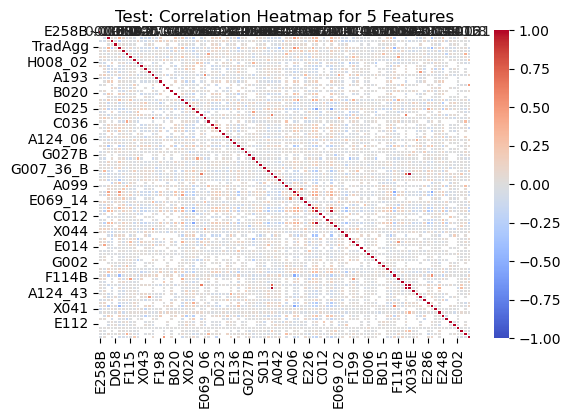

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select 5 random numeric columns
sample_cols = np.random.choice(df.select_dtypes(include=['number']).columns, 100, replace=False)
df_sample = df[sample_cols]

# Compute correlation matrix for the sample
corr_matrix_sample = df_sample.corr()

# Plot the heatmap for the sample
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix_sample, annot=True, cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Test: Correlation Heatmap for 5 Features")
plt.show()


### Handling Inconsistent Data

### Handling Outliers

# Feature Engineering

## Feature Encoding 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the Label Encoder
encoder = LabelEncoder()

# Apply encoding
df['COUNTRY_ALPHA_ENCODED'] = encoder.fit_transform(df['COUNTRY_ALPHA'])

# Drop original categorical column
df.drop(columns=['COUNTRY_ALPHA'], inplace=True)

# Verify encoding
print(df[['COUNTRY_ALPHA_ENCODED']])


## Feature Selection 

# Predicting happiness 

Predicting the features :
- A008 (Feeling of happiness) 
- A170 (Satisfaction with life) 


In [ ]:
# Compute correlation between both targets
correlation_with_happines = pd.DataFrame(df['A170']).corrwith(df['A008'])
print(correlation_with_happines)

A170   -0.465009
dtype: float64


In [ ]:
# determine the range of values
for col in ['A008','A170']:
   print(df[col].unique())

[3. 2. 1. 4.]
[ 3.  9.  4.  7.  5.  2.  8.  6.  1. 10.]


understand the distribution of the target variables

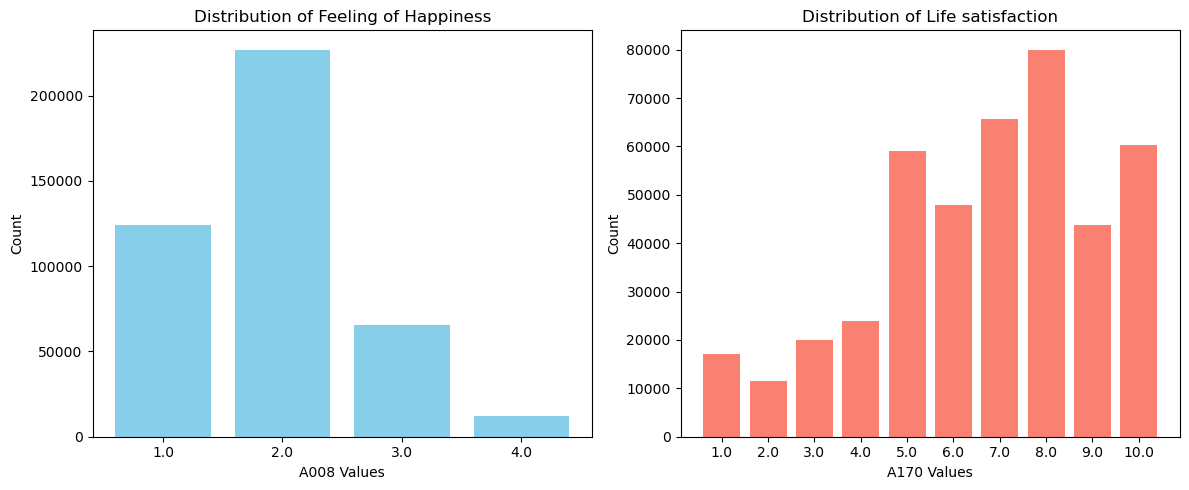

In [ ]:

# Count the occurrences of each category/value and sort by index
counts_A008 = df['A008'].value_counts().sort_index()
counts_A170 = df['A170'].value_counts().sort_index()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot bar chart for A008
axes[0].bar(counts_A008.index.astype(str), counts_A008.values, color='skyblue')
axes[0].set_title('Distribution of Feeling of Happiness')
axes[0].set_xlabel('A008 Values')
axes[0].set_ylabel('Count')

# Plot bar chart for A170
axes[1].bar(counts_A170.index.astype(str), counts_A170.values, color='salmon')
axes[1].set_title('Distribution of Life satisfaction')
axes[1].set_xlabel('A170 Values')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


### Ordinal Logistic Regression  (Proportional Odds Model)


In [ ]:
X = df.drop(columns=[['A008','A170']],errors='ignore')# Initialize Variance Threshold Selector (removes near-constant features)
y_hap = df['A008']
y_sats = df['A170']

##### Remove Low-Variance Features

In [ ]:
## checking for non-numeric columns 
non_numeric_columns = X.select_dtypes(exclude=['number']).columns
print(f"Non-numeric columns: {list(non_numeric_columns)}")


Non-numeric columns: []


##### GENERAL interation

In [ ]:
missing_values = X_train.isnull().sum()/len(df) * 100
print(f"Total missing values in X_train: {missing_values[missing_values>0]}")

Total missing values in X_train: S004        67.148253
S010        46.929769
S011B       54.948372
S013         8.672051
S013B       49.934795
              ...    
X050C       55.580861
survself    25.441416
tradrat5    25.441416
TradAgg     25.441416
SurvSAgg    25.441416
Length: 446, dtype: float64


In [ ]:
# mean imputation
df.fillna(df.mean(), inplace=True)

In [ ]:
## Building the model 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import accuracy_score

X=df.drop(columns=['A170'])
y = df['A170']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)


model = OrderedModel(
    y_train,  # Target variable (ordinal)
    X_train,  # Features (with an intercept)
    distr="logit"  # Proportional odds model (use 'probit' for an alternative)
)
result = model.fit(method='bfgs')

y_pred = result.predict(sm.add_constant(X_test))

# Convert probabilities to class labels (choose highest probability)
y_pred_classes = np.argmax(y_pred, axis=1) + 1  # +1 because indexing starts at 0


accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

KeyboardInterrupt: 

Check for constant columns that cause the error in the model 

In [ ]:
# Identify columns that have only one unique value
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
print("Constant columns (nunique method):", constant_columns)


Constant columns (nunique method): []


In [ ]:
constant_columns_std = [col for col in X_train.columns if X_train[col].std() == 0]
print("Constant columns (std method):", constant_columns_std)

Constant columns (std method): []


In [ ]:
df.drop(columns=['S001'],inplace=True)

it column S001 which is  the indentifier of the study

In [ ]:
from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
import pandas as pd

# Prepare features and target
X = df_pca.drop(columns=['A170'])
y = df_pca['A170']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to float32 to reduce memory usage
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Remove constant columns if any
constant_columns = [col for col in X_train.columns if X_train[col].nunique() == 1]
if constant_columns:
    X_train = X_train.drop(columns=constant_columns)
    X_test = X_test.drop(columns=constant_columns)
    print("Dropped constant columns:", constant_columns)

# Select top 10 features using ANOVA F-score
selector = SelectKBest(score_func=f_classif, k=15)
X_train_reduced = selector.fit_transform(X_train, y_train)
X_test_reduced = selector.transform(X_test)

# Get the names of the selected features
selected_features = X_train.columns[selector.get_support()]
print("Selected top 10 features:", selected_features)

Selected top 10 features: Index(['A008', 'A009', 'A173', 'C006', 'E124', 'F118', 'H008_04', 'X044',
       'X045', 'X047_WVS', 'X047R_WVS', 'survself', 'tradrat5', 'TradAgg',
       'SurvSAgg'],
      dtype='object')


In [ ]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the PCA-reduced data into features and target
X = df_pca.drop(columns=['A170'])
y = df_pca['A170']

# Split the data into training and testing sets
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train_reduced.shape}, Test set shape: {X_test_reduced.shape}")

Training set shape: (171648, 374), Test set shape: (42912, 374)


In [ ]:
# Sample 50% of the data for quicker model iteration
sample_size = int(0.5 * len(X_train_reduced))
sample_idx = np.random.choice(np.arange(len(X_train_reduced)), size=sample_size, replace=False)

# Create sampled datasets
X_train_sample = X_train_reduced.iloc[sample_idx]
y_train_sample = y_train.iloc[sample_idx]

# Build the ordinal logistic regression model without adding a constant manually
model = OrderedModel(
    y_train_sample,  # Target variable
    X_train_sample,   # Features from PCA
    distr="logit"    # Using 'probit' (alternatives: 'logit')
)

# Fit the model using the L-BFGS optimization method
result = model.fit(method='lbfgs', disp=True)

# Show the model summary
print(result.summary())

y_pred = result.predict(X_test_reduced)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1) + 1  # Assuming classes start at 1

# Check the predicted classes
print(y_pred_classes[:10])


ValueError: The indices for endog and exog are not aligned

In [ ]:
X_test

,S002VS,S003,COW_NUM,S004,S006,S007,MODE,S010,S011B,S013,...,X003R,X003R2,X050C,survself,tradrat5,TradAgg,SurvSAgg,COUNTRY_ALPHA_ENCODED,month,day
282058,7,558,93,1.093564,558071106,558721106,1,53.000000,9.420000,3.0,...,1.0,1.0,1.000000,0.160143,-1.517126,-2.542573,0.327860,68,12,30
425407,2,710,560,1.093564,2327,7100222327,6,73.528665,13.969556,1.0,...,6.0,3.0,1.327268,-0.159869,-1.405561,-2.362953,-0.251363,105,0,0
356305,3,705,349,1.000000,814,7050320814,6,60.000000,13.969556,2.0,...,4.0,2.0,1.327268,-0.792019,0.715553,1.052040,-1.395554,88,0,0
98265,7,203,316,1.093564,203070235,203720235,1,59.000000,19.070000,2.0,...,6.0,3.0,1.000000,0.680808,0.566114,0.811443,1.270262,19,3,6
319205,6,275,667,1.093564,686,2750620686,6,73.528665,13.969556,2.0,...,1.0,1.0,1.327268,-0.056176,-0.129046,-0.307763,-0.063679,78,2,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382567,7,792,640,1.093564,792070593,792720593,2,73.528665,13.969556,1.0,...,1.0,1.0,1.000000,1.041638,-0.986014,-1.687482,1.923364,94,4,14
19461,5,36,900,1.093564,456,360520456,6,73.528665,13.969556,1.0,...,3.0,2.0,1.327268,1.215105,-1.700348,-2.837560,2.237341,4,0,0
254265,3,484,70,2.000000,1210,4840321210,6,45.000000,18.000000,1.0,...,2.0,1.0,1.327268,0.308123,-1.300045,-2.193073,0.595702,60,0,0
40673,6,112,370,1.093564,614,1120620614,6,73.528665,13.969556,2.0,...,6.0,3.0,1.327268,-0.056176,-0.129046,-0.307763,-0.063679,10,0,0


### Random Forest / Decision Tree

In [ ]:
# XGboost 

In [ ]:
# CatGboost 

In [ ]:
# LightGboost

In [ ]:
# Ordinal SVM 

In [ ]:
# Neural Networks for Ordinal Data ( DeepLearning)

## Algorithm benchmarking

# Detailed analysis on income

# Statistical tests 

# Time series analysis (1981-2022)

# Sentiment Analysis on Open-Ended Responses (NLP)